In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time
import datetime
import seaborn as sns

%matplotlib inline

In [10]:
df = pd.read_csv('crypto_prices.csv')

In [11]:
df.head()

,dtime,open_BTC,high_BTC,low_BTC,close_BTC,vwap_BTC,volume_BTC,count_BTC,log_high_BTC,log_low_BTC,...,open_LTC,high_LTC,low_LTC,close_LTC,vwap_LTC,volume_LTC,count_LTC,log_high_LTC,log_low_LTC,log_vwap_LTC
0,2020-10-01,10774.9,10930.0,10451.0,10582.3,10687.4,4708.909113,17098,9.299267,9.254453,...,46.24,48.47,45.22,46.34,46.81,30822.568060,2015,3.880945,3.811539,3.846097
1,2020-09-30,10841.4,10842.4,10670.0,10774.9,10735.3,2473.829221,10450,9.291220,9.275191,...,45.66,46.65,45.48,46.24,45.99,17335.470485,1106,3.842673,3.817273,3.828424
2,2020-09-29,10694.1,10860.0,10645.0,10842.2,10739.0,2743.908282,11824,9.292842,9.272846,...,45.21,45.77,44.95,45.66,45.42,11704.058289,868,3.823629,3.805551,3.815953
3,2020-09-28,10776.1,10945.0,10640.0,10694.1,10866.7,3476.448483,13436,9.300638,9.272376,...,46.10,47.14,44.83,45.21,46.47,22907.891823,1320,3.853122,3.802878,3.838807
4,2020-09-27,10733.4,10799.0,10600.0,10776.1,10711.8,1581.063377,7583,9.287209,9.268609,...,46.05,46.57,44.63,46.10,45.70,12568.506357,699,3.840957,3.798406,3.822098


In [12]:
df.set_index('dtime', inplace=True)

In [13]:
df.head()

,open_BTC,high_BTC,low_BTC,close_BTC,vwap_BTC,volume_BTC,count_BTC,log_high_BTC,log_low_BTC,log_vwap_BTC,...,open_LTC,high_LTC,low_LTC,close_LTC,vwap_LTC,volume_LTC,count_LTC,log_high_LTC,log_low_LTC,log_vwap_LTC
dtime,,,,,,,,,,,,,,,,,,,,,
2020-10-01,10774.9,10930.0,10451.0,10582.3,10687.4,4708.909113,17098,9.299267,9.254453,9.276821,...,46.24,48.47,45.22,46.34,46.81,30822.568060,2015,3.880945,3.811539,3.846097
2020-09-30,10841.4,10842.4,10670.0,10774.9,10735.3,2473.829221,10450,9.291220,9.275191,9.281293,...,45.66,46.65,45.48,46.24,45.99,17335.470485,1106,3.842673,3.817273,3.828424
2020-09-29,10694.1,10860.0,10645.0,10842.2,10739.0,2743.908282,11824,9.292842,9.272846,9.281637,...,45.21,45.77,44.95,45.66,45.42,11704.058289,868,3.823629,3.805551,3.815953
2020-09-28,10776.1,10945.0,10640.0,10694.1,10866.7,3476.448483,13436,9.300638,9.272376,9.293458,...,46.10,47.14,44.83,45.21,46.47,22907.891823,1320,3.853122,3.802878,3.838807
2020-09-27,10733.4,10799.0,10600.0,10776.1,10711.8,1581.063377,7583,9.287209,9.268609,9.279101,...,46.05,46.57,44.63,46.10,45.70,12568.506357,699,3.840957,3.798406,3.822098


In [14]:
# Need to reset the index so it starts with oldest date first to properly plot.

df = df.reindex(index=df.index[::-1])

In [15]:
df.head()

,open_BTC,high_BTC,low_BTC,close_BTC,vwap_BTC,volume_BTC,count_BTC,log_high_BTC,log_low_BTC,log_vwap_BTC,...,open_LTC,high_LTC,low_LTC,close_LTC,vwap_LTC,volume_LTC,count_LTC,log_high_LTC,log_low_LTC,log_vwap_LTC
dtime,,,,,,,,,,,,,,,,,,,,,
2018-10-13,6192.2,6219.1,6171.7,6197.9,6199.6,922.828331,3614,8.735380,8.727730,8.732240,...,52.84,53.88,52.42,52.84,53.02,5258.671260,668,3.986759,3.959288,3.970669
2018-10-14,6197.9,6289.9,6150.0,6181.8,6226.9,1237.100596,5098,8.746700,8.724207,8.736634,...,52.84,53.35,50.85,51.14,52.07,5024.065251,625,3.976874,3.928880,3.952589
2018-10-15,6181.9,6820.0,6151.0,6438.5,6449.8,11345.747326,28535,8.827615,8.724370,8.771804,...,51.14,58.09,50.86,53.48,53.71,38150.198318,3528,4.061994,3.929077,3.983599
2018-10-16,6438.5,6490.0,6391.5,6460.4,6441.8,3270.364601,8233,8.778018,8.762724,8.770563,...,53.48,54.19,52.54,53.10,53.35,11349.662323,702,3.992496,3.961575,3.976874
2018-10-17,6460.3,6469.8,6411.9,6442.5,6438.4,1683.992001,5375,8.774900,8.765911,8.770035,...,53.10,53.22,52.30,52.93,52.69,4882.802936,605,3.974434,3.956996,3.964426


<Figure size 1440x360 with 0 Axes>

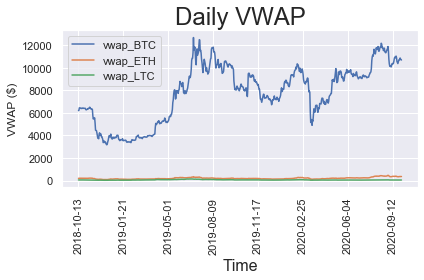

In [16]:
fig = plt.figure(figsize = (20, 5))
df.plot(y=['vwap_BTC', 'vwap_ETH', 'vwap_LTC'])
plt.title('Daily VWAP', size = 24)
plt.xlabel("Time", size = 16)
plt.xticks(rotation = 90)
plt.ylabel("VWAP ($)")

plt.tight_layout()
plt.savefig('EDA_daily_vwap.png', dpi=fig.dpi)

<Figure size 1440x360 with 0 Axes>

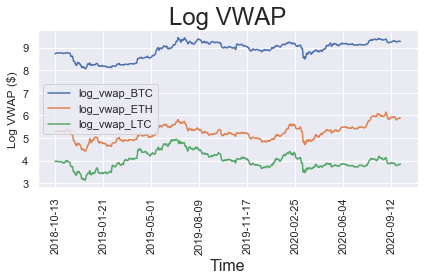

In [17]:
fig = plt.figure(figsize=(20, 5))
df.plot(y=['log_vwap_BTC', 'log_vwap_ETH', 'log_vwap_LTC'])
plt.title("Log VWAP", size = 24)
plt.xlabel("Time", size = 16)
plt.xticks(rotation = 90)
plt.ylabel("Log VWAP ($)")

plt.tight_layout()

plt.savefig("EDA_daily_log_vwap.png", dpi=fig.dpi)

The log transformation allows a better view of how the prices move in conjunction. There appears to be a bit of a relationship.

## Daily Returns

Going to calculate the daily return based on the VWAP and the log_vwap price.

In [18]:
df['BTC_daily_return'] = df['vwap_BTC'].pct_change()

<Figure size 1440x360 with 0 Axes>

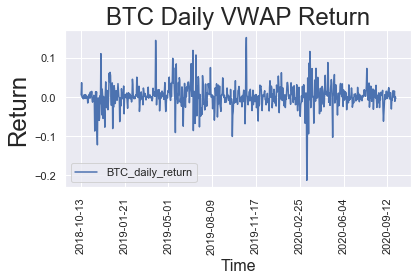

In [19]:
fig = plt.figure(figsize=(20, 5))

df.plot(y=['BTC_daily_return'])
plt.title("BTC Daily VWAP Return", size = 24)
plt.xlabel("Time", size=16)
plt.xticks(rotation = 90)
plt.ylabel("Return", size=24)

plt.tight_layout()

plt.savefig('EDA_BTC_daily_vwap_return.png')


In [20]:
df['ETH_daily_return'] = df['vwap_ETH'].pct_change()

<Figure size 1440x360 with 0 Axes>

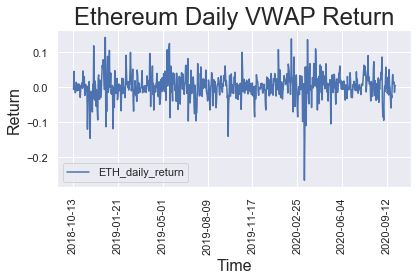

In [21]:
fig = plt.figure(figsize=(20, 5))

df.plot(y=['ETH_daily_return'])
plt.title("Ethereum Daily VWAP Return", size=24)
plt.xlabel("Time", size=16)
plt.xticks(rotation=90)
plt.ylabel("Return", size=16)

plt.tight_layout()

plt.savefig('EDA_ETH_daily_vwap_return.png')

In [22]:
df['LTC_daily_return'] = df['vwap_LTC'].pct_change()

<Figure size 1440x360 with 0 Axes>

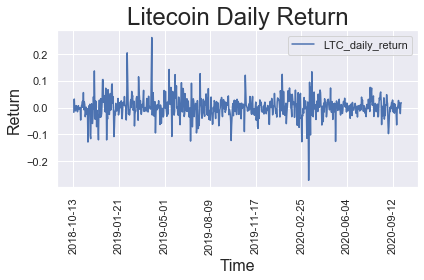

In [23]:
fig = plt.figure(figsize = (20, 5))

df.plot(y=['LTC_daily_return'])
plt.title("Litecoin Daily Return", size = 24)
plt.xlabel("Time", size = 16)
plt.xticks(rotation = 90)
plt.ylabel("Return", size = 16)

plt.tight_layout()

plt.savefig('EDA_LTC_daily_vwap_return.png')

<Figure size 2160x360 with 0 Axes>

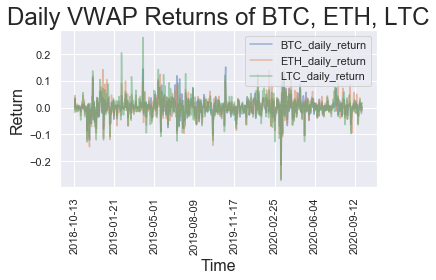

In [25]:
fig = plt.figure(figsize=(30, 5))

df.plot(y=['BTC_daily_return', 'ETH_daily_return', 'LTC_daily_return'],
       alpha=0.5)
plt.title("Daily VWAP Returns of BTC, ETH, LTC", size = 24)
plt.xlabel("Time", size = 16)
plt.xticks(rotation=90)
plt.ylabel("Return", size = 16)

plt.tight_layout()

plt.savefig('EDA_daily_returns_all.png')

Plotting the daily return of VWAP shows a relationship in returns. Later EDA will test if the time-series is stationary or requires transformations to become statationary.

In [26]:
df['BTC_log_vwap_return'] = df['log_vwap_BTC'].pct_change()
df['ETH_log_vwap_return'] = df['log_vwap_ETH'].pct_change()
df['LTC_log_vwap_return'] = df['log_vwap_LTC'].pct_change()

<Figure size 1440x360 with 0 Axes>

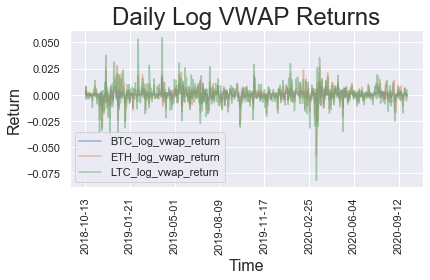

In [27]:
fig = plt.figure(figsize=(20, 5))

df.plot(y=['BTC_log_vwap_return', 'ETH_log_vwap_return', 'LTC_log_vwap_return'],
       alpha=0.5)
plt.title("Daily Log VWAP Returns", size = 24)
plt.xlabel("Time", size = 16)
plt.xticks(rotation = 90)
plt.ylabel("Return", size = 16)

plt.tight_layout()

plt.savefig('EDA_daily_log_returns_all.png')

## Histogram of Returns

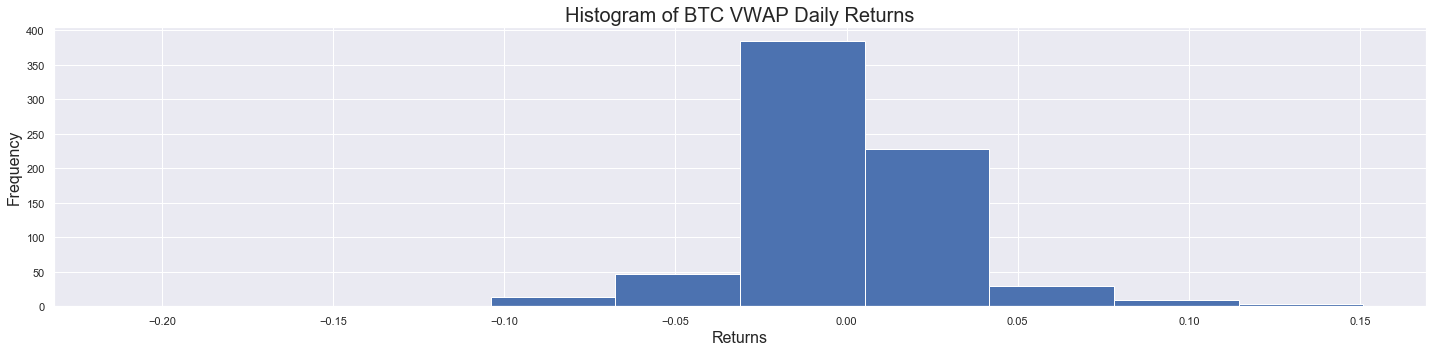

In [28]:
fig = plt.figure(figsize=(20, 5))

df['BTC_daily_return'].plot.hist()
plt.title("Histogram of BTC VWAP Daily Returns", size = 20)
plt.xlabel("Returns", size = 16)
plt.ylabel("Frequency", size = 16)

plt.tight_layout()

plt.savefig('EDA_hist_btc_ret.png')

Text(0, 0.5, 'Frequency')

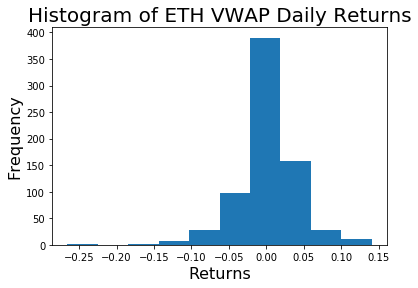

In [22]:
df['ETH_daily_return'].plot.hist()
plt.title("Histogram of ETH VWAP Daily Returns", size = 20)
plt.xlabel("Returns", size = 16)
plt.ylabel("Frequency", size = 16)

Text(0, 0.5, 'Frequency')

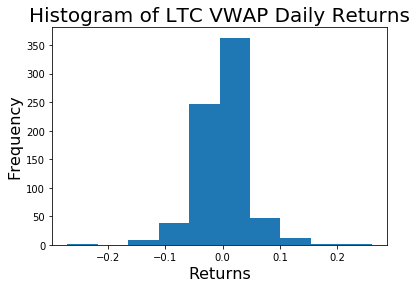

In [23]:
df['LTC_daily_return'].plot.hist()
plt.title("Histogram of LTC VWAP Daily Returns", size = 20)
plt.xlabel("Returns", size = 16)
plt.ylabel("Frequency", size = 16)

## Histogram of Daily Log Returns

Text(0, 0.5, 'Frequency')

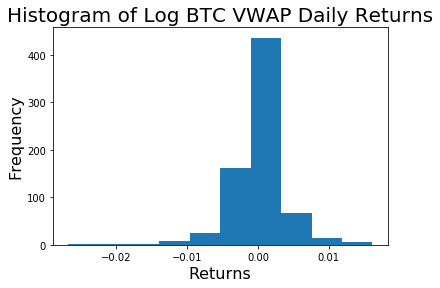

In [24]:
df['BTC_log_vwap_return'].plot.hist()
plt.title("Histogram of Log BTC VWAP Daily Returns", size = 20)
plt.xlabel("Returns", size = 16)
plt.ylabel("Frequency", size = 16)

Text(0, 0.5, 'Frequency')

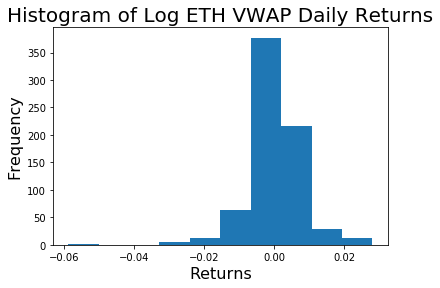

In [25]:
df['ETH_log_vwap_return'].plot.hist()
plt.title("Histogram of Log ETH VWAP Daily Returns", size = 20)
plt.xlabel("Returns", size = 16)
plt.ylabel("Frequency", size = 16)

Text(0, 0.5, 'Frequency')

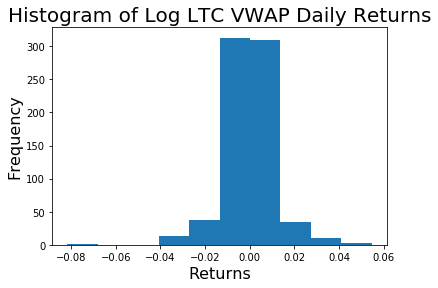

In [26]:
df['LTC_log_vwap_return'].plot.hist()
plt.title("Histogram of Log LTC VWAP Daily Returns", size = 20)
plt.xlabel("Returns", size = 16)
plt.ylabel("Frequency", size = 16)

## KDE Plots, daily/log returns

Text(0, 0.5, 'Density')

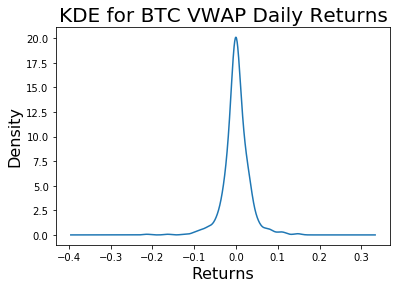

In [27]:
df['BTC_daily_return'].plot.kde()
plt.title("KDE for BTC VWAP Daily Returns", size = 20)
plt.xlabel("Returns", size = 16)
plt.ylabel("Density", size = 16)

Text(0, 0.5, 'Density')

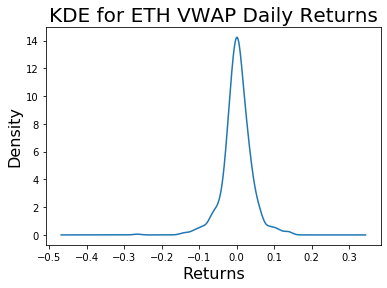

In [28]:
df['ETH_daily_return'].plot.kde()
plt.title("KDE for ETH VWAP Daily Returns", size = 20)
plt.xlabel("Returns", size = 16)
plt.ylabel("Density", size = 16)

Text(0, 0.5, 'Density')

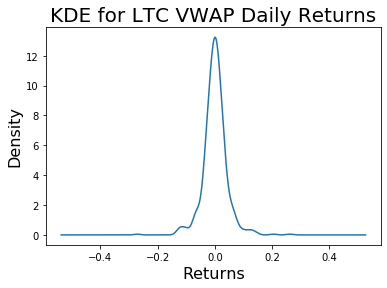

In [29]:
df['LTC_daily_return'].plot.kde()
plt.title("KDE for LTC VWAP Daily Returns", size = 20)
plt.xlabel("Returns", size = 16)
plt.ylabel("Density", size = 16)

<Figure size 432x288 with 0 Axes>

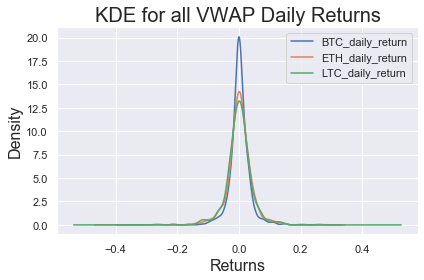

In [29]:
fig = plt.figure()

df[['BTC_daily_return', 'ETH_daily_return', 'LTC_daily_return']].plot.kde()
plt.title("KDE for all VWAP Daily Returns", size = 20)
plt.xlabel("Returns", size = 16)
plt.ylabel("Density", size = 16)

plt.tight_layout()

plt.savefig('EDA_kde_returns_all.png')

Very similar distributions between all three. Fairly uniform with some left skew on LTC and right skew on ETH.

<Figure size 432x288 with 0 Axes>

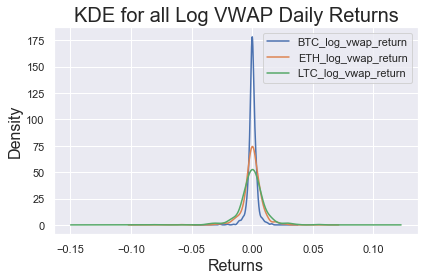

In [30]:
fig = plt.figure()

df[['BTC_log_vwap_return', 'ETH_log_vwap_return', 'LTC_log_vwap_return']].plot.kde()
plt.title("KDE for all Log VWAP Daily Returns", size = 20)
plt.xlabel("Returns", size = 16)
plt.ylabel("Density", size = 16)

plt.tight_layout()

plt.savefig('EDA_kde_log_returns_all.png')

Log transformation normalizes returns a big more. Fairly symmetric distribution with some skew for LTC.

## Boxplots of Daily/Log Returns

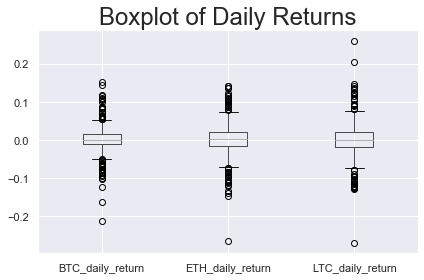

In [31]:
fig = plt.figure()

df[['BTC_daily_return', 'ETH_daily_return', 'LTC_daily_return']].boxplot(figsize=(10, 5))
plt.title("Boxplot of Daily Returns", size = 24)

plt.tight_layout()

plt.savefig('EDA_boxplot')

Boxplot gives us a different view of the returns. LTC has the biggest outliers.

## Volume

<Figure size 432x288 with 0 Axes>

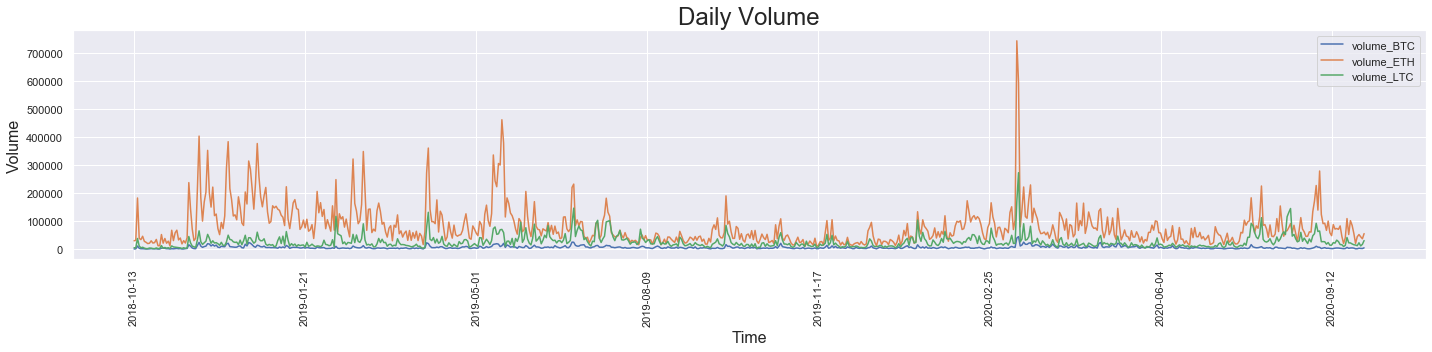

In [32]:
fig = plt.figure()

df.plot(y=['volume_BTC', 'volume_ETH', 'volume_LTC'], figsize = (20, 5))
plt.title("Daily Volume", size = 24)
plt.xlabel("Time", size = 16)
plt.xticks(rotation = 90)
plt.ylabel("Volume", size = 16)

plt.tight_layout()

plt.savefig('EDA_volume.png')

ETH volume has more volatility than BTC and LTC. Could be something worth investigating.

## Experimenting with Pandas Lag Plot

In [34]:
from pandas.plotting import lag_plot

Text(0.5, 1.0, 'Lag Plot - BTC Daily Returns')

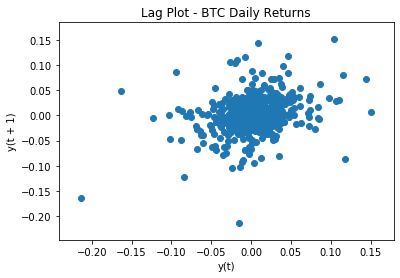

In [35]:
lag_plot(df['BTC_daily_return'])
plt.title("Lag Plot - BTC Daily Returns")

Text(0.5, 1.0, 'Lag Plot - ETH Daily Returns')

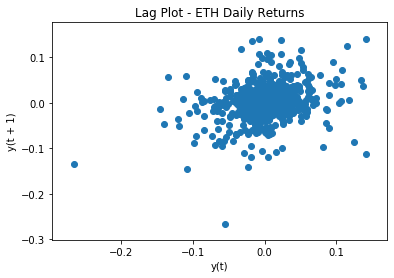

In [36]:
lag_plot(df['ETH_daily_return'])
plt.title("Lag Plot - ETH Daily Returns")

Text(0.5, 1.0, 'Lag Plot - LTC Daily Returns')

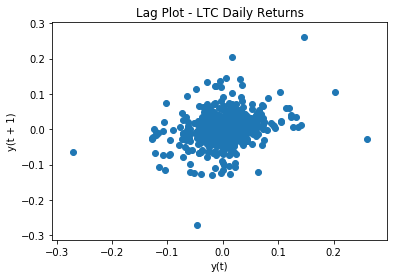

In [37]:
lag_plot(df['LTC_daily_return'])
plt.title("Lag Plot - LTC Daily Returns")

Lag plots for log returns

Text(0.5, 1.0, 'Lag Plot - BTC Log Daily Returns')

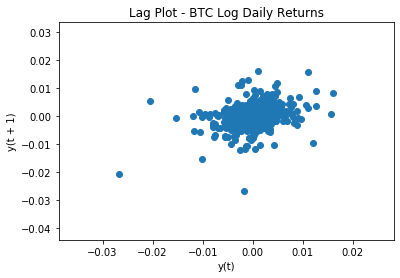

In [38]:
lag_plot(df['BTC_log_vwap_return'])
plt.title("Lag Plot - BTC Log Daily Returns")

Text(0.5, 1.0, 'Lag Plot - ETH Log Daily Returns')

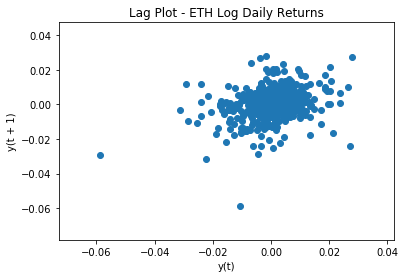

In [39]:
lag_plot(df['ETH_log_vwap_return'])
plt.title("Lag Plot - ETH Log Daily Returns")

Text(0.5, 1.0, 'Lag Plot - LTC Log Daily Returns')

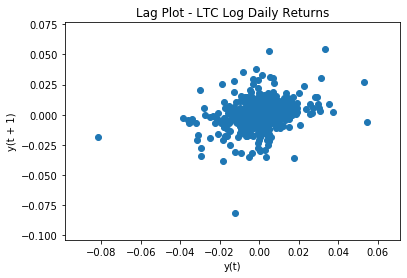

In [40]:
lag_plot(df['LTC_log_vwap_return'])
plt.title("Lag Plot - LTC Log Daily Returns")

---

### Correlation Plots

In [41]:
df[['BTC_daily_return', 'ETH_daily_return', 'LTC_daily_return']].corr()

,BTC_daily_return,ETH_daily_return,LTC_daily_return
BTC_daily_return,1.000000,0.821484,0.779724
ETH_daily_return,0.821484,1.000000,0.826911
LTC_daily_return,0.779724,0.826911,1.000000


In [34]:
corr = df[['BTC_daily_return', 'ETH_daily_return', 'LTC_daily_return']].corr()

<Figure size 432x288 with 0 Axes>

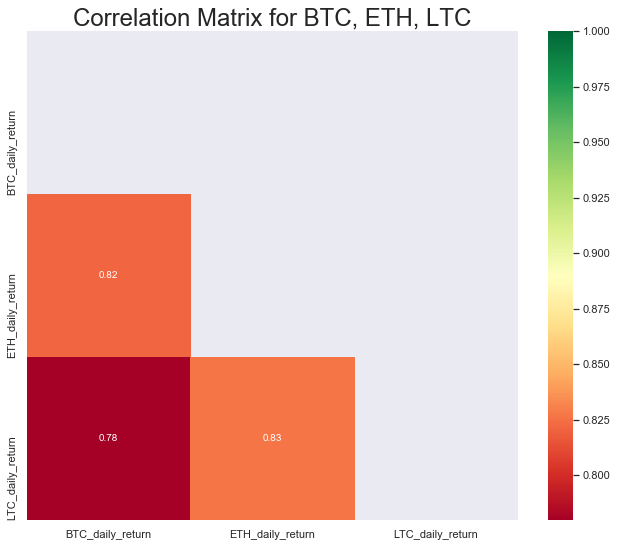

In [35]:
fig = plt.figure()

f, ax = plt.subplots(figsize=(11, 9))

mask = np.triu(np.ones_like(corr, dtype=bool))

sns.heatmap(corr, cmap='RdYlGn',annot=True,
           mask = mask)

plt.title("Correlation Matrix for BTC, ETH, LTC", size = 24)

plt.savefig('EDA_corr_heatmap.png')